# Advection-Diffusion Equation

Hello everyone! we have already learned about advection equation and diffusion equation in the second module separately. However, the world is not always that simple. What will happen when advection combines with diffusion? Here we are! we get a new equation: advection-diffusion equation.


The advection-diffusion equation are widely used to describe how heat or particles transport inside the physical system according to both advection and diffusion processes. The first part is really simple and straightforward. We'll mention about the 1-D AD equation and its exact solution. We want you to solve it with numerical solution and compare it with exact solution to see if the result is accurate enough? In the second part, we mainly discuss about 2-D AD equation in pollutant problem. We'll discretized the 2-D AD equation and solve it with numerical solution, and then we'll try to plot the result in 2D and 3D figures to understand the result more visually.

## 1-D AD Equation

Now, quick look at the one-dimensional AD equation:


$$\frac{\partial C}{\partial x}+u\frac{\partial C}{\partial x}=D\frac{\partial^2 C}{\partial x^2}$$


where C(x,t) is the concentration of the pollutant with respect to position x and time t. u is the constant speed along x direction and D is the diffusion coefficient.

And the boundary and initial condition are given:

$$~C(0,t)~=~0;~C(L,t)~=~1;~C(x,0)~=~\frac{x}{L},~(0\leq x\leq L)$$

Where $~L~=~1.0~m$ , $~D~=~0.01~m^{2}s^{-1}$, $~u~=~0.1~ms^{-1}$, $~\Delta ~x~=~0.02~m$ and $~\Delta t~=~0.01s$. 

In this case, it has an exact solution:

$$C=\frac{e^{R_{L}x/L}-1}{e^{R_{L}}-1}; ~ R_{L}=\frac{uL}{D}$$

Now , could you solve the problem with discretized methods we learned in previous modules, and check if the results convergent to the exact solution? Caution! $dt$ still needs restrictions to maintain the equation stable.

### Compute, Plot and Animation 

In [1]:
%matplotlib inline
import numpy
import sympy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 51
dx = 1/(nx-1)
nt = 1000
dt = 0.01
u = 0.1     # constant speed of u = 0.1 m/s
D = 0.01    # diffusion coefficient of D = 0.01
L = 1.0

x = numpy.linspace(0,1,nx)
C = numpy.zeros(nx)
for i in range(nx):
    if 0 <= x[i] <= 1:
        C[i] = x[i]/L

R = u * L / D
C_exact = (numpy.exp(R * x / L) - 1) / (numpy.exp(R) - 1)

In [3]:
from matplotlib import animation
from IPython.display import HTML

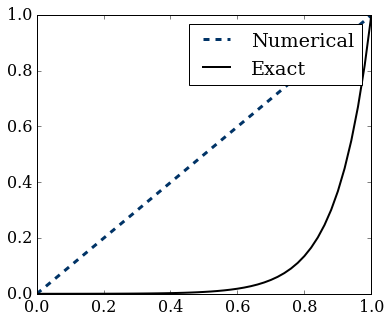

In [4]:
fig = pyplot.figure(figsize=(6,5))
ax = pyplot.axes(xlim=(0,1), ylim=(0,1))
line = ax.plot([], [], color='#003366', ls='--', lw =3)[0]
line2 = ax.plot([], [], 'k-', lw=2)[0]
ax.legend(['Numerical','Exact'])
def AD_equation(i):
    
    Cn = C.copy()
    
    C[1:-1] = Cn[1:-1] -\
              u * dt / (2 * dx) * (Cn[2:] - Cn[0:-2]) +\
              D * dt / dx**2 * (Cn[2:] - 2 * Cn[1:-1] + Cn[0:-2])
    C[0] = 0
    C[-1] = 1
            
    C_exact = (numpy.exp(R * x / L) - 1) / (numpy.exp(R) - 1)
    line.set_data(x,C)
    line2.set_data(x,C_exact)
    
anim = animation.FuncAnimation(fig, AD_equation,
                               frames=nt, interval=10)

In [5]:
HTML(anim.to_html5_video())

Looks good! The numerical solution is converge to the exact solution which means our discretized method is correct!

# 2-D AD Equation

1-D AD equation is just appetizer. Now, let's discuss about 2-D AD equation:

$$\frac{\partial C}{\partial t}+u\frac{\partial C}{\partial x}+\nu \frac{\partial C}{\partial y}=D(\frac{\partial^2 C}{\partial x^2}+\frac{\partial^2 C}{\partial y^2})$$

where u is a constant speed in x direction, $\nu$ is a constant speed in y direction and D is a constant diffusion coefficient in the horizontal direction.

Then, we set some appropriate initial and boundary conditions.



$$C(x,y,0)  = 0;~0< x\leq 1  ; ~ 0< y\leq 1$$


$$C(0,y,t)  = 1 ;~0.5\leq y\leq 1$$


$$C(x,0,t)  =  1 ;~ 0.3\leq x\leq 0.6$$


$$\frac{\partial C}{\partial x}(0,y,t)  = q_{x} ;~0< y\leq 1$$


$$\frac{\partial C}{\partial y}(x,0,t)  =  q_{y} ;~0< x\leq 1$$

we set the initial parameters: $L~=~1.0~m$ , $W~=~1.0~m$, $D~=~0.01~m^{2}s^{-1}$, $u~=~0.1~ms^{-1}$, $\Delta x~=~0.02~m$ and $\Delta t~=~0.01~s$, and assume this system is insulate so that $q_{x}  ~=~q_{y} ~ = ~0$.

### Discretize eqaution

we use forward difference for time, central difference in space and 2nd-order method for the second derivatives yields like 1-D AD equation. The only difference is that we should store C in 2-D array $C_{i,j}$.

$$\frac{C_{i,j}^{n+1}-C_{i,j}^{n}}{\Delta t}+u\frac{C_{i+1,j}^{n}-C_{i-1,j}^{n}}{2\Delta x}+\nu\frac{C_{i,j+1}^{n}-C_{i,j-1}^{n}}{2\Delta y}=D(\frac{C_{i+1,j}^{n}-2C_{i,j}^{n}+C_{i-1,j}^{n}}{\Delta x^{2}}+\frac{C_{i,j+1}^{n}-2C_{i,j}^{n}+C_{i,j-1}^{n}}{\Delta y^{2}})$$

Next time step value $C_{i,j}^{n+1}$ can be expressed as:

$$C_{i,j}^{n+1}=C_{i,j}^{n}-u\frac{\Delta t}{2\Delta x}(C_{i+1,j}^{n}-C_{i-1,j}^{n})-\nu\frac{\Delta t}{2\Delta y}(C_{i,j+1}^{n}-C_{i,j-1}^{n})+D(\frac{\Delta t}{\Delta x^{2}}(C_{i+1,j}^{n}-2C_{i,j}^{n}+C_{i-1,j}^{n})+\frac{\Delta t}{\Delta y^{2}}(C_{i,j+1}^{n}-2C_{i,j}^{n}+C_{i,j-1}^{n}))$$

### Now! Compute and Plot

In [7]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.special import erfc

Set initial parameters and boundary conditions.

In [8]:
L = 1.0
W = 1.0

nx = 51
ny = 51
nt = 1000

dx = L/(nx-1)
dy = W/(ny-1)

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,W,ny)

D = 0.01    # diffusion coefficient in horizontal direction D = 0.01
u = 0.1     # constant speed in x direction u = 0.1 m/s
v = 0.1     # constant speed in y direction v = 0.1 m/s

dt = 0.01

In [9]:
### set the boundary conditions
C = numpy.zeros((ny, nx))

for i in range(ny):
    if 0.5 <= y[i]: 
        C[i,0] = 1
    else: 
        C[i,0] = 0

for i in range(nx):
    if 0.3 <= x[i] and 0.6 >= x[i]: 
        C[0,i] = 0.5
    else:
        C[0,i] = 0

Now, define the 2-D AD equation function by discretized method. Neumann boundary is used in this function.

In [10]:
def AD_equation_2d(C, nt, D, u, v, dt, dx, dy):
    
    for n in range(nt):
        
        Cn = C.copy()
        
        C[1:-1,1:-1] = Cn[1:-1,1:-1] -\
                       u * dt / (2 * dx) * (Cn[1:-1,2:] - Cn[1:-1,:-2]) -\
                       v * dt / (2 * dy) * (Cn[2:,1:-1] - Cn[:-2,1:-1]) +\
                       D * dt / dx**2 * (Cn[1:-1,2:] - 2 * Cn[1:-1,1:-1] + Cn[1:-1,:-2]) +\
                       D * dt / dy**2 * (Cn[2:,1:-1] - 2 * Cn[1:-1,1:-1] + Cn[:-2,1:-1])
        
        # Enforce Neumann BCs
        C[-1,:] = C[-2,:]
        C[:,-1] = C[:,-2]
        
    return C

Visualize 2-D AD equation's result

In [11]:
C_2d = AD_equation_2d(C.copy(), nt, D, u, v, dt, dx, dy)

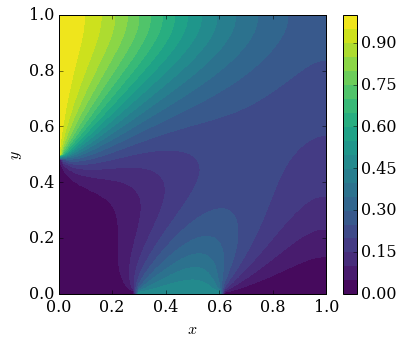

In [12]:
pyplot.figure(figsize=(6,5))
pyplot.contourf(x,y,C_2d,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

Is the result too abstract? Let's plot the result in 3D figure.

In [13]:
def plot_3D(x, y, C):
    
    fig = pyplot.figure(figsize=(7,5), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,C[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.view_init(30,45)

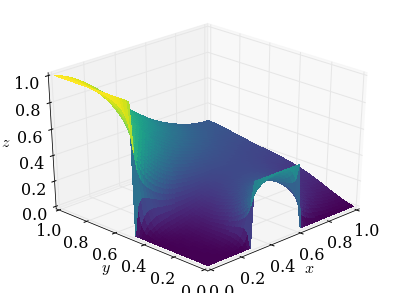

In [14]:
plot_3D(x,y,C_2d)

## Finial words

Advection-Diffusion equation is an interesting problem. It is revealed to us how the Concentration (C) changes in 1-D and 2-D physical system along with time and space. We plot 2D and 3D figures to show the process. There is also 3-D AD equation and it is more practical. Can you figure it out by yourselves?

## References

* M. Thongmoon, R, McKibbin. ***A Comparison of Some Numerical Methods for the Advection-Diffusion Equation***
* M. Thongmoon, R, McKibbin, ***S. Tangmanee. Numerical solution of a 3-D Advection-Dispersion Model for Pollutant Transport***